# Neural Networks

Neural network is no mystery, it is just a function with powerful learning ability.

At this time, you don't need to care much details about its complicated structure.

In Julia, two deep learning packages are commonly used:
- `Flux.jl`:[Welcome · Flux](https://fluxml.ai/Flux.jl/stable/)
- `Lux.jl`:[LuxDL Docs](https://lux.csail.mit.edu/)

Here, we use `Flux.jl` as an example. More details can be seen in packages official documents.

## IMPORTANT: Activate Julia environment first

In [25]:
using Pkg
Pkg.activate(".")

  Activating project at `~/Desktop/MyProjects/Julia_Tutorial_on_AI4MathBiology`


## Multilayer neural network as a function

You only need to regard neural network as a function $f(x,p)$, $x$ input, $p$ parameters.

In [ ]:
using Flux
dnn_model = Chain(Dense(1, 10, swish), Dense(10, 100,swish),Dense(100, 10, swish), Dense(10, 1))
# Remark: In Deep Learning, there is no one dimensional scalar but one dimensional vector 
dnn_model([1.0f0])

1-element Vector{Float32}:
 -0.040261105

In [27]:
dnn_model2 = Chain(Dense(2, 10, swish), Dense(10, 100,swish),Dense(100, 10, swish), Dense(10, 2))
# Remark: f0 here means we use Float32
dnn_model2([1.0f0,2.0f0])[1]

0.100376524f0

Note here that we didn't set parameters for this deep learning architecture, however, it has an input. Why? 

The reason is that in `Flux.jl`, a DNN model has parameters pre defined. Sometimes, it is very inconvenient. Thus, we need to destructure the neural network, so that we can change the parameter of the neural network.

## IMPORTANT: destructure

In [28]:
parameter, structure=Flux.destructure(dnn_model2) # parameters and structures
newpara = parameter*0.1 .+ 0.3
# DNN with new parameters
f(x,p)=structure(p)(x)# x input, p parameter
println("DNN with new parameter:", f([1.0f0,2.0f0],newpara))

DNN with new parameter:Float32[286.11746, 278.07166]


## Using DNN to learn $\sin(x)$

In [29]:
using Flux
using Flux:train!,params
# 1. Gennerate Data and Define DNN
x = Array(-2π:0.01:2π)'
data = sin.(x)
#dnn_model = Chain(Dense(1, 1), x-> cos.(x))
#dnn_model = Chain(Dense(1, 128, relu), Dense(128, 1), x-> cos.(x))
dnn_model = Chain(Dense(1, 10, swish), Dense(10, 100,swish),Dense(100, 10, swish), Dense(10, 1))
# dnn_model = Chain(Dense(1, 32, relu), Dense(32, 1, tanh))


# 2. Define Loss Functions
loss2(a,b) = Flux.Losses.mae(dnn_model(x), data)

# Train the model
opt=ADAM(0.02)
println(loss2(x, data))
train!(loss2, Flux.params(dnn_model), [(x,data)], opt)
println(loss2(x, data))



for epoch in 1:5000
    train!(loss2, params(dnn_model), [(x,data)], opt)
    if epoch%500==0
    println(loss2(x, data))
    end
end

0.6178579239993328
0.8133888838007648


0.029455694189493377


0.019722234455541977


0.02941249289718608


0.044564484807402126


0.017978833994311296


0.018942334715419555


0.04541769339893456


0.019092272589503845


0.020229457337176477


0.02070247009650008


Data visulization

0.02070247009650008


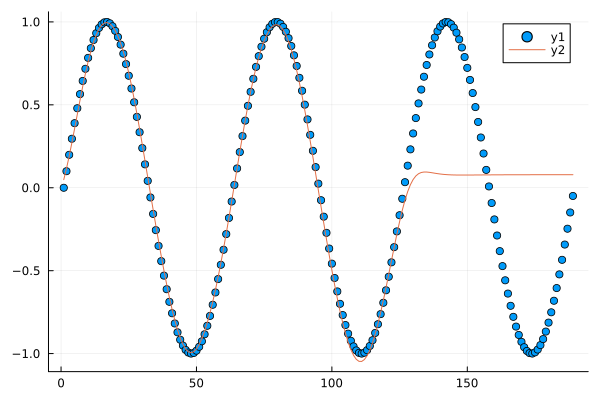

In [30]:
using Plots
println(loss2(x, data))
y = Array(-2π:0.1:4π)'
scatter(sin.(y)')
plot!(dnn_model(y)')


### Question: why this DNN learn the $\sin(x)$ data but  fails to predict $\sin(x)$? How to improve the performance?

## Optimization

Training a deep learning model is an optimization problem. In Julia, there is a unified optimization package with many popular optimizers, such as LBFS, BFGS, ADAM, SGD, evolution algorithms. For more details, one can seen
- [Optimization.jl: A Unified Optimization Package · Optimization.jl](https://docs.sciml.ai/Optimization/stable/)

At this time, you only need to understand the following example:
$$\min_{x} (x_1-p_1)^2+p_2*(x_2-x_1^2)^2$$
where $p$ is parameter you can pre defined.

In [34]:
# Import the package and define the problem to optimize
using Optimization
rosenbrock(u, p) = (p[1] - u[1])^2 + p[2] * (u[2] - u[1]^2)^2
u0 = zeros(2)
p = [1.0, 100.0]

prob = OptimizationProblem(rosenbrock, u0, p)

# Import a solver package and solve the optimization problem
using OptimizationOptimJL
sol = solve(prob, NelderMead())

retcode: Success
u: 2-element Vector{Float64}:
 0.9999634355313174
 0.9999315506115275

Import a different solver package and solve the optimization problem a different way

In [33]:
using OptimizationBBO
prob = OptimizationProblem(rosenbrock, u0, p, lb = [-1.0, -1.0], ub = [1.0, 1.0])
sol = solve(prob, BBO_adaptive_de_rand_1_bin_radiuslimited())

retcode: Failure
u: 2-element Vector{Float64}:
 0.9999999999999876
 0.9999999999999785